We assume the images are located in the the `images` folder, itself located at the root folder of the project.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from data_generation import make_circle
from orientation_transformer import OrientationScoreTransformer

In [10]:
# these parameters take ~1 minute to fit to have a nice visualisation, 
# scale down the size of the image/the patch to increase speed.
img = make_circle(501)
transformer = OrientationScoreTransformer(patch_size=51, num_slices=50)
transformer.fit(img)
val = transformer.transform(img)

In [ ]:
f, axs = plt.subplots(ncols=5, figsize=(20, 5))
for ax in axs:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
axs[0].matshow(transformer._cake_slices[0])
axs[1].matshow(transformer._wavelets[0].imag)

# zoom a little bit on the wavelet
zoomed_slice = slice(int(3*transformer.patch_size/8),int(5*transformer.patch_size/8))

axs[2].matshow(transformer._wavelets[0].imag[zoomed_slice, zoomed_slice])
axs[3].matshow(img)
axs[4].matshow(val[:, :, 0]>100)

In [ ]:
import ipyvolume
ipyvolume.quickvolshow(150*(val>80),level=[150], level_width=[10])

In [3]:
import os
import os.path
from utils import read_norm_img
import pickle

In [8]:
SE2_IMAGES_PATH='../images_transformed_se2/'
if not os.path.exists(SE2_IMAGES_PATH):
    os.makedirs(SE2_IMAGES_PATH)
for i in range(669, 1521):  # change to 1521 for full transformation
    print(i)
    filename = f'{i:04}.jpg'
    img = read_norm_img(i)
    transformer = OrientationScoreTransformer(patch_size=51, num_slices=12)
    transformed_img = transformer.fit_transform(img)
    with open(os.path.join(SE2_IMAGES_PATH, filename), 'wb') as fh:
        pickle.dump(transformed_img, fh)

669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714


KeyboardInterrupt: 

In [4]:

with open('../images_transformed_se2/0000.jpg', 'rb') as f:
    img = pickle.load(f)

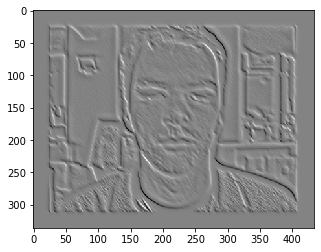

In [5]:
plt.imshow(img[:, :, 3], cmap='gray')

## Convert to jpg for disk space handling

In [9]:
PATH = '../images_transformed_se2/'

files = os.listdir(PATH)

for file in files: 
    with open(PATH + file, 'rb') as f: 
     
        img = pickle.load(f) 
        if not os.path.exists('../images_s2/' + file.rstrip('.jpg')):  
            os.makedirs('../images_s2/' + file.rstrip('.jpg')) 
        for i in range(12): 
            im = img[:, :, i] 
            plt.imsave('../images_s2/' + file.rstrip('.jpg') + '/' + '{00:02}.jpg'.format(i), im) 

In [7]:
list(range(668, 1251))[-1]

1250